# MNIST Dataset Prediction

### Importing the libraries

In [102]:
import pandas as pd
import numpy as np

In [103]:
from tensorflow.keras.datasets import mnist

In [104]:
#defining our training and testing data 
(x_train,y_train),(x_test,y_test)=mnist.load_data()

### Data visualization for better understanding of the data provided

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline       
#enables inline plotting 

In [106]:
x_train.shape

(60000, 28, 28)

In [107]:
y_train.shape

(60000,)

In [108]:
x_test.shape

(10000, 28, 28)

In [109]:
y_test.shape

(10000,)

In [110]:
single_img=x_train[0]

In [111]:
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [112]:
single_img.shape

(28, 28)

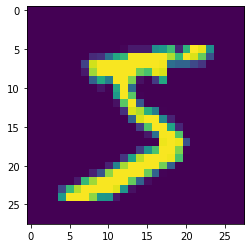

In [113]:
plt.imshow(single_img)

### DATA PREPROCESSING

In [114]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [115]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [116]:
y_test.min()

0

In [117]:
y_test.max()

9

In [118]:
#This means our data has values ranging from 0-9 i.e. 10 types of values.

Now since the above data is numerical we need to one-hot code it or CNN might try to relate the data points to one another based on their values, but we know that they don't have any relational value.

In [119]:
from tensorflow.keras.utils import to_categorical

In [120]:
y_train_cat=to_categorical(y_train)

In [121]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [122]:
y_train[0]

5

In [123]:
y_test_cat=to_categorical(y_test)

In [124]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [125]:
y_test[0]

7

### NORMAILIZING THE INPUT DATA

In [126]:
single_img.max()

255

In [127]:
single_img.min()

0

In [128]:
x_train=x_train/255
x_test=x_test/255

In [129]:
scaled_x_single=x_train[0]

In [130]:
scaled_x_single.max()

1.0

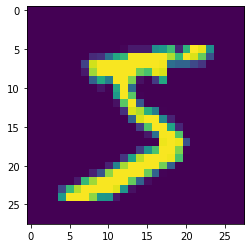

In [131]:
plt.imshow(scaled_x_single)

### Reshaping the data 

 We need to reshape the data such that there is another value for color channel in the shape tupple
 (A single value for one rgb color channel as the images are essentially in greyscale)

In [132]:
x_train.shape

(60000, 28, 28)

In [133]:
x_test.shape

(10000, 28, 28)

In [134]:
x_train.shape

(60000, 28, 28)

In [135]:
x_test.shape

(10000, 28, 28)

### CREATING THE MODEL

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [137]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten images from 28 by 28 to 764 before the final layer
model.add(Flatten())

# Adding a dense layer with 128 neurons
model.add(Dense(128, activation='relu'))

# This layer being the classifier must have 10 classes
model.add(Dense(10, activation='softmax'))

# Compiling layer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [138]:
#summary of the model we created
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [139]:
#Creating an EarlyStopping parameter

In [140]:
# We create an EarlyStopping paramter to avoid overfitting and stop the training process when some criteria is met.

In [141]:
from tensorflow.keras.callbacks import EarlyStopping

In [142]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

### TRAINING THE CREATED MODEL

In [143]:
model.fit(x_train,y_train_cat,epochs=10,validation_data=(x_test,y_test_cat),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1436 - accuracy: 0.9578 - val_loss: 0.0524 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0484 - accuracy: 0.9856 - val_loss: 0.0461 - val_accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0451 - val_accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0370 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.0409 - val_accuracy: 0.9874
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0393 - val_accuracy: 0.9874


### MODEL EVALUATION

In [144]:
model.metrics_names

['loss', 'accuracy']

In [145]:
losses=pd.DataFrame(model.history.history)

In [146]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.143583,0.957850,0.052371,0.9820
1,0.048397,0.985567,0.046103,0.9847
2,0.031307,0.990250,0.045059,0.9847
3,0.020900,0.993517,0.036984,0.9882
4,0.015322,0.995150,0.040862,0.9874
5,0.010653,0.996467,0.039255,0.9874


<AxesSubplot:>

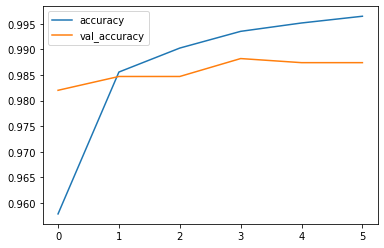

In [147]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

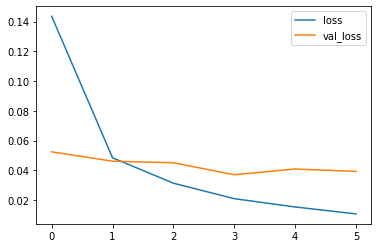

In [148]:
losses[['loss','val_loss']].plot()

In [149]:
print(model.metrics_names)
print(model.evaluate(x_test,y_test_cat,verbose=0))

['loss', 'accuracy']
[0.03925463557243347, 0.9873999953269958]


In [150]:
from sklearn.metrics import classification_report,confusion_matrix

In [151]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 0s 1ms/step


In [152]:
y_test_cat.shape

(10000, 10)

In [153]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [154]:
classes_x[0]

7

In [155]:
y_test[0]

7

In [156]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [157]:
c_mat=confusion_matrix(y_test,classes_x)

In [158]:
c_mat

array([[ 976,    1,    0,    0,    0,    0,    2,    0,    0,    1],
       [   0, 1131,    1,    0,    0,    0,    1,    1,    1,    0],
       [   2,    2, 1019,    0,    1,    0,    2,    4,    2,    0],
       [   0,    0,    1, 1004,    0,    3,    0,    0,    2,    0],
       [   1,    1,    1,    0,  972,    0,    2,    0,    0,    5],
       [   3,    1,    0,   13,    0,  864,    8,    0,    1,    2],
       [   1,    2,    0,    1,    1,    2,  950,    0,    1,    0],
       [   1,    1,    7,    2,    0,    0,    0, 1010,    1,    6],
       [   5,    1,    1,    0,    0,    0,    5,    2,  958,    2],
       [   0,    2,    0,    4,    7,    1,    0,    3,    2,  990]])

In [159]:
import seaborn as sns

<AxesSubplot:>

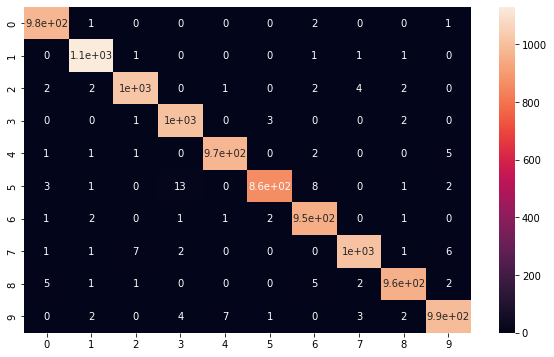

In [160]:
plt.figure(figsize=(10,6))
sns.heatmap(c_mat,annot=True)

## PREDICTING A GIVEN IMAGE

In [161]:
my_num=x_test[0]

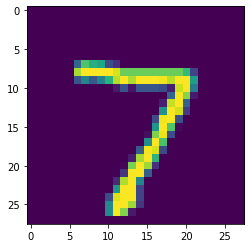

In [162]:
plt.imshow(my_num.reshape(28,28))

In [163]:
predict_x=model.predict(my_num.reshape(1,28,28,1)) 
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 22ms/step


In [164]:
classes_x

array([7])